#Trabalho 2 - Aprendizado de Máquina 1

Integrantes do Grupo:


*   Bruno Leonel Nunes, RA - 770214
*   Júlia Almeida, RA - 772116
*   Yan Gimenez, RA - 769826



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

%matplotlib inline

In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340262 sha256=5d578303aee62f479ee3b7e6691415a4e074909bff7239bbea47c2e723c0e5ce
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [ ]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##**[Descrição dos Dados](https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub)**
* **Gender**: gênero (masculino ou feminino)
* **Age**: idade (numérico)
* **Height**: altura (numérico)
* **Weight**: peso (numérico)
* **familiy_history_with_overweight**: família com histórico de obesidade (sim ou não)
* **FAVC**: consumo de comida altamente calórica frequentemente (sim ou não)
* **FCVC**: frequência de consumo de vegetai
* **NCP**: número de refeições principais
* **CAEC**: consumo de alimentos entre as refeiçõe
* **SMOKE**: pessoa fumante ou não
* **CH2O**: consumo de litros de água por dia
* **SCC**: monitoramento de calorias consumidas diariamente (sim ou não)
* **FAF**: frequência de atividade física (entre 0 a 5 dias)
* **TUE**: tempo de uso de dispositivos tecnológicos
* **CALC**: consumo de álcool (nunca, às vezes, frequentemente etc)
* **MTRANS**: meio de transporte usado com frequência
* **NObeyesdad**: nível de obesidade


In [ ]:
data[['family_history_with_overweight', 'FAVC',
      'SMOKE', 'SCC', 'CAEC', 'CALC','MTRANS','Gender']] = OrdinalEncoder().fit_transform(data[['family_history_with_overweight', 'FAVC', 
                                                                                                 'SMOKE', 'SCC', 'CAEC', 'CALC','MTRANS','Gender']])
# Yes = 1
# No = 0 
#-------------------------------------------------------#
# Always = 0
# Frequently = 1
# Sometimes = 2 
# No = 3

##Visualização dos Dados:

No gráfico 1, é possível visualizar quais genêros (dentre os fumantes e os não fumantes) possui alto grau de histórico de obesidade na família.

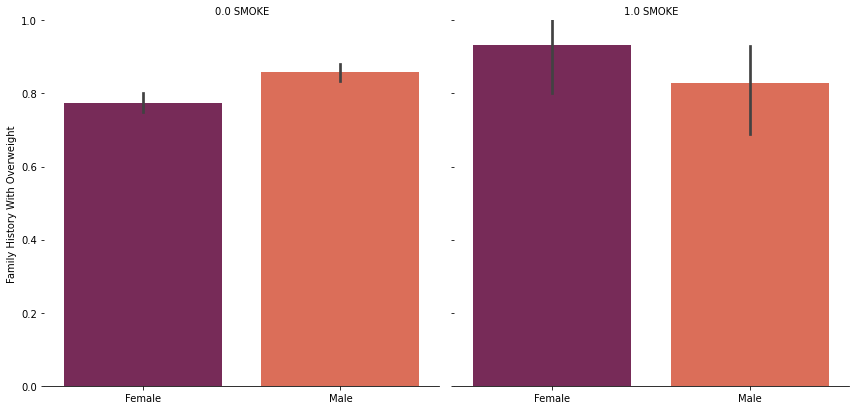

In [ ]:
graph1 = sns.catplot(data=data, x="Gender", y="family_history_with_overweight", 
                     col="SMOKE", kind="bar", palette="rocket",height=6)
graph1.set_axis_labels("", "Family History With Overweight")
graph1.set_xticklabels(["Female", "Male"])
graph1.set_titles("{col_name} {col_var}")
graph1.set(ylim=(0, 1))
graph1.despine(left=True)

No gráfico 2, é possível observar a distribuição dos níveis de obesidade entre os gêneros feminino e masculino

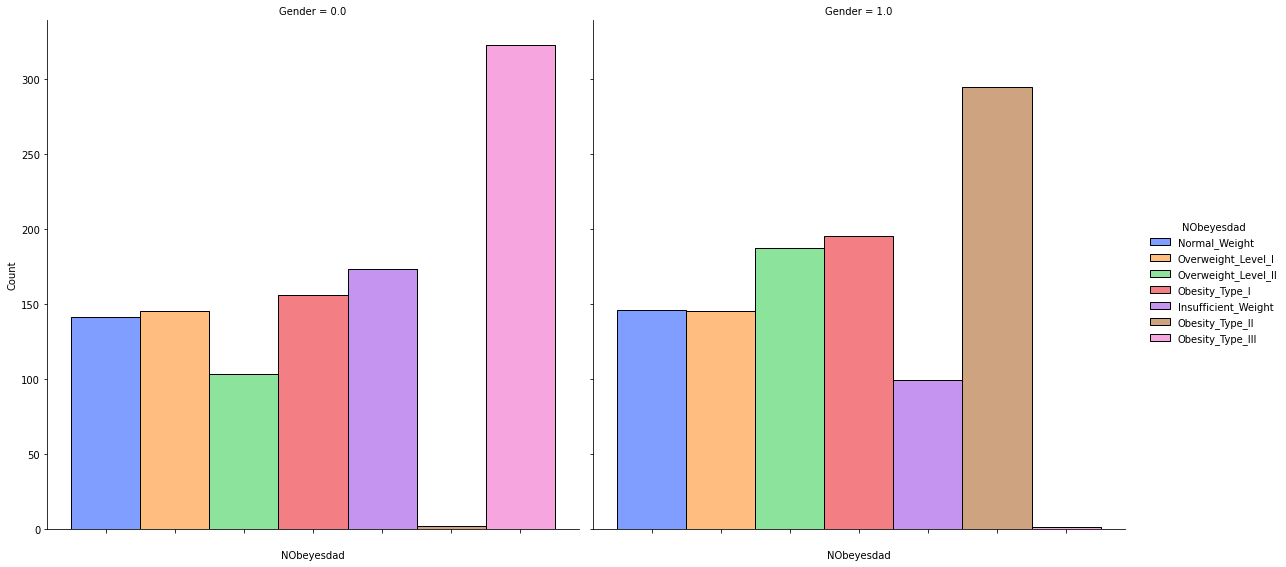

In [ ]:
graph2 = sns.displot(data, x="NObeyesdad", col="Gender", hue="NObeyesdad", height=8, palette="bright")
graph2.set_xticklabels([" "])

No gráfico 3, é possível observar o nível de distribuição dos tipos de obesidade no dataset

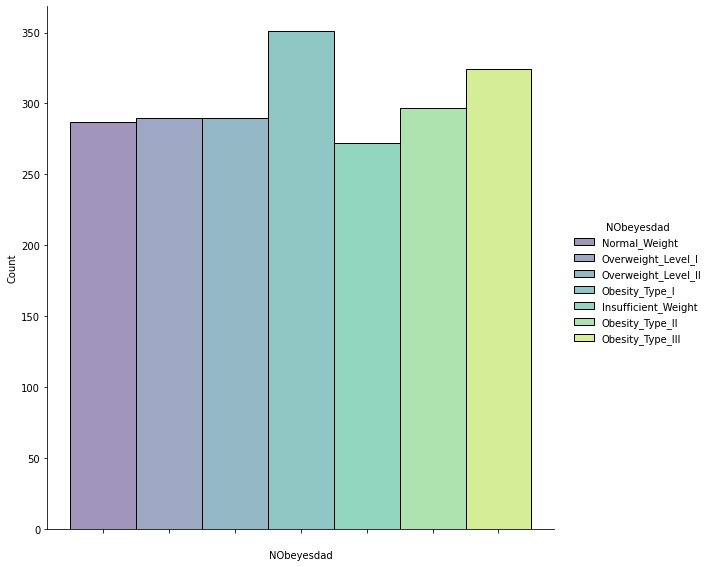

In [ ]:
graph3 = sns.displot(data, x="NObeyesdad", hue='NObeyesdad', height=8, palette="viridis")
graph3.set_xticklabels([" "])

No gráfico 4, observa-se a probabilidade de uma pessoa consumir alimentos calóricos e ter um certo grau de obesidade

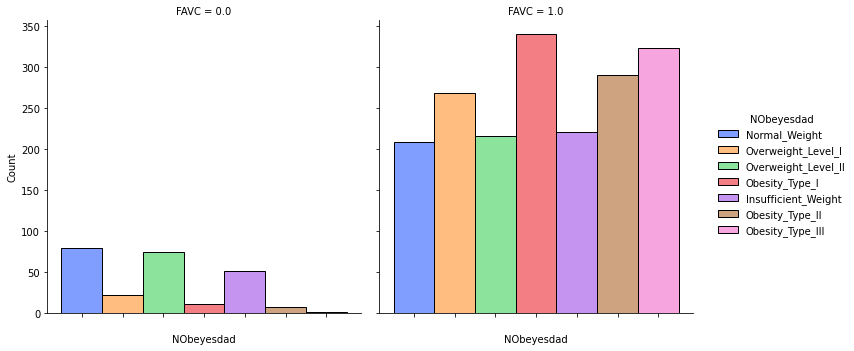

In [ ]:
graph4 = sns.displot(data, x="NObeyesdad", col="FAVC", hue="NObeyesdad", height=5, palette="bright")
graph4.set_xticklabels([" "])

No gráfico 5, observa-se a relação entre a idade, o peso e altura para determinados graus de obesidade

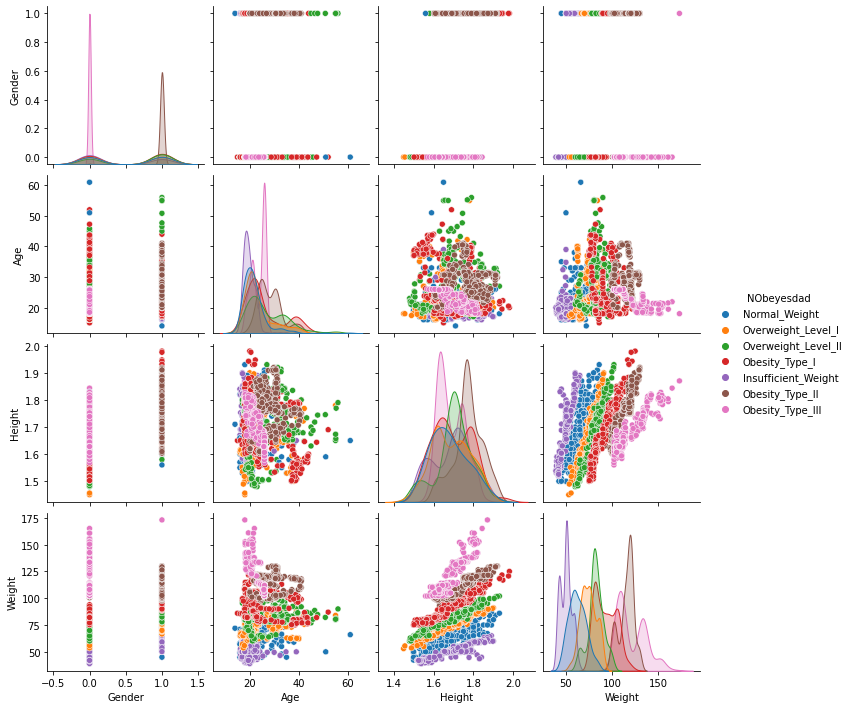

In [ ]:
data_pairplot1 = data[['Gender', 'Age', 'Height','Weight','NObeyesdad']]
graph5 = sns.pairplot(data_pairplot1, hue='NObeyesdad')

In [ ]:
#Removendo classe alvo
data[['NObeyesdad']] = OrdinalEncoder().fit_transform(data[['NObeyesdad']])
data_obs = data["NObeyesdad"]
data = data.drop('NObeyesdad', axis=1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   float64
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   float64
 5   FAVC                            2111 non-null   float64
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   float64
 9   SMOKE                           2111 non-null   float64
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   float64
 12  FAF                             21

In [ ]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0


#Clustering


In [ ]:
from sklearn.decomposition import PCA
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(data)
PCA_ds = pd.DataFrame(pca.transform(data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2111.0,-1.206341e-14,26.226929,-47.750875,-21.069504,-3.650583,20.931145,85.963146
col2,2111.0,4.308360e-16,6.260354,-10.816785,-4.302349,-1.477905,0.888679,37.273226
col3,2111.0,-1.077090e-16,1.023915,-3.705266,-0.369669,0.150183,0.676289,4.545996


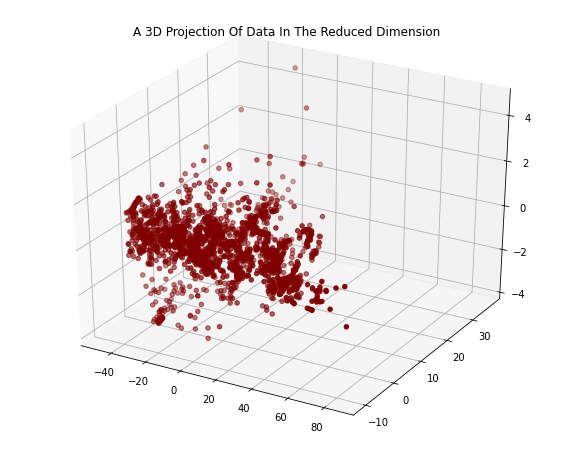

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

##Gabarito

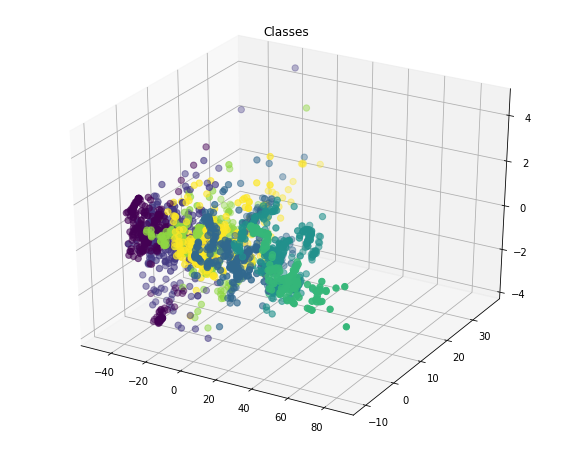

In [ ]:
#Plotting the clusters
PCA_ds["Clusters_gab"] = data_obs
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters_gab"], marker='o')
ax.set_title("Classes")
plt.show()

##KMeans

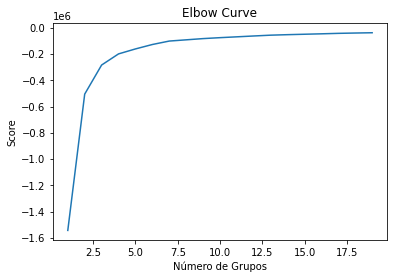

In [ ]:
from sklearn.cluster import KMeans

# Buscando o melhor número de cluster para o K-means 
iter = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in iter]
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]

plt.plot(iter, score)
plt.xlabel("Número de Grupos")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show()

4 cluster aparenta ser o melhor numero 

In [ ]:
from sklearn.cluster import KMeans
#Numer of cluster = 4
model1 = KMeans(n_clusters = 4, init='k-means++', random_state=99)
#Numer of cluster = 7
model2 = KMeans(n_clusters = 7, init='k-means++', random_state=99)

model1.fit(data)
model2.fit(data)

KMeans(n_clusters=7, random_state=99)

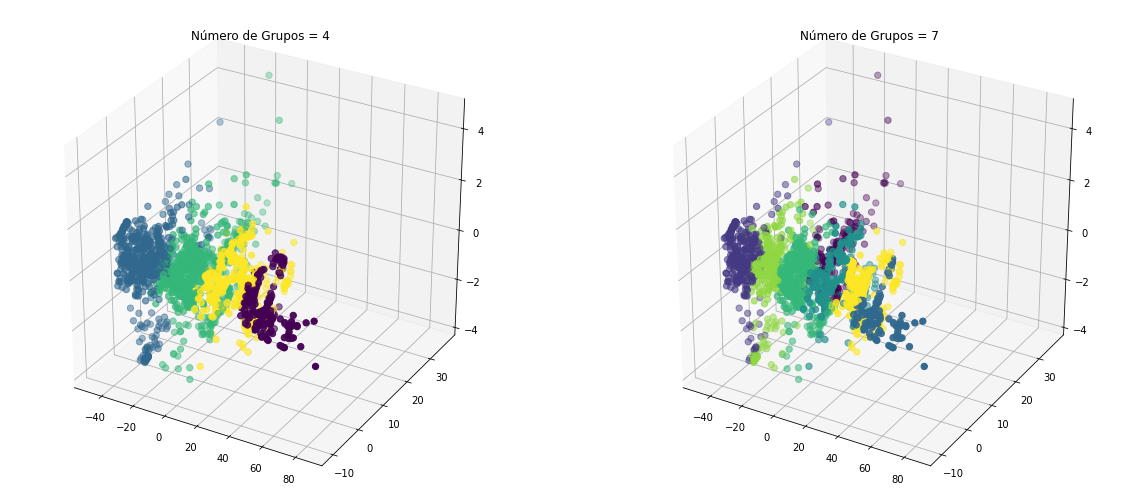

In [ ]:
fig = plt.figure(figsize=(20, 9))

#Numer of cluster = 4
yhat_AC1 = model1.fit_predict(data)
PCA_ds["Clusters_HDBSCAN"] = yhat_AC1

#Plotting the clusters 
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters_HDBSCAN"], marker='o')
ax.set_title("Número de Grupos = 4")

#--------------------------------------------------------------------

#Numer of cluster = 7
yhat_AC2 = model2.fit_predict(data)
PCA_ds["Clusters_HDBSCAN"] = yhat_AC2

#Plotting the clusters
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters_HDBSCAN"], marker='o')
ax.set_title("Número de Grupos = 7")


plt.show()

##DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3.3, min_samples = 43)
yhat_AC = clustering.fit_predict(data)
PCA_ds["Clusters_DBSCAN"] = yhat_AC

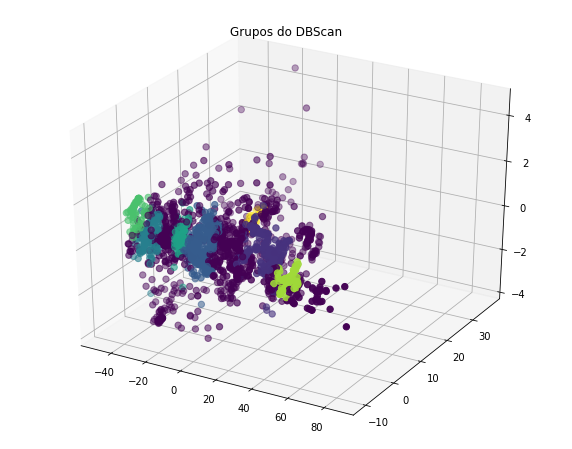

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters_DBSCAN"], marker='o')
ax.set_title("Grupos do DBScan")
plt.show()

In [ ]:
max(clustering.labels_)

6

## HDBSCAN

In [ ]:
import hdbscan

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=43, gen_min_span_tree=True)
clusterer.fit(data)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=43)

In [ ]:
max(clusterer.labels_)

6

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


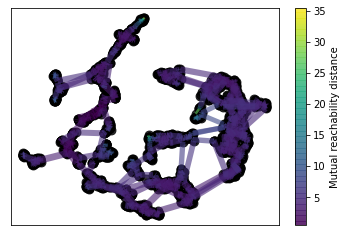

In [ ]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

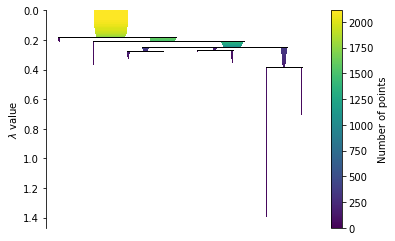

In [ ]:
clusterer.condensed_tree_.plot()

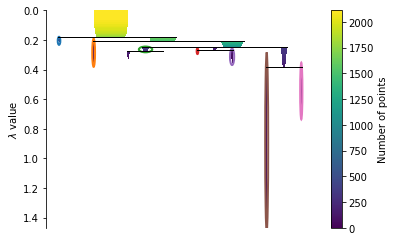

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

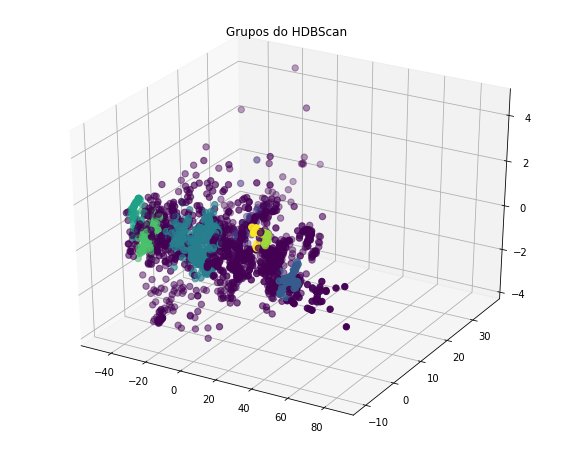

In [ ]:
yhat_AC = clusterer.fit_predict(data)
PCA_ds["Clusters_HDBSCAN"] = yhat_AC
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters_HDBSCAN"], marker='o')
ax.set_title("Grupos do HDBScan")
plt.show()